# King County House Price Prediction

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

It's a great dataset for evaluating simple regression models.

Kaggle: https://www.kaggle.com/code/shiv28/house-price-prediction-in-king-county-usa

# Data Dictionary


id :a notation for a house

date: Date house was sold

price: Price is prediction target

bedrooms: Number of Bedrooms/House

bathrooms: Number of bathrooms/bedrooms

sqft_living: square footage of the home

sqft_lot: square footage of the lot

floors :Total floors (levels) in house

waterfront :House which has a view to a waterfront

view: Has been viewed

condition :How good the condition is Overall

grade: overall grade given to the housing unit, based on King County grading system

sqft_above :square footage of house apart from basement

sqft_basement: square footage of the basement

yr_built :Built Year

yr_renovated :Year when house was renovated

zipcode:zip code

lat: Latitude coordinate

long: Longitude coordinate

sqft_living15 :Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area

sqft_lot15 :lotSize area in 2015(implies-- some renovations)


![image](https://images.mapsofworld.com/usa/states/washington/king-wa-county-map.jpg)

In [ ]:
## Importing Libraries

In [3]:
import pandas as pd

pd.set_option('display.max_columns', 100)
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor

import warnings  # To ignore any warnings

warnings.filterwarnings("ignore")


## Load the data

In [4]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## EDA - Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
16896,6752600050,20140812T000000,320000.0,4,2.50,2070,7007,2.0,0,0,3,7,2070,0,1996,0,98031,47.3968,-122.171,2130,8100
19626,3343301343,20141120T000000,880000.0,5,3.50,4600,8764,2.0,0,0,3,10,3180,1420,2007,0,98006,47.5491,-122.190,3210,9431
5813,8078440050,20140730T000000,569500.0,4,2.50,2340,8248,2.0,0,0,3,8,2340,0,1989,0,98074,47.6314,-122.030,2140,9963
2580,2591720070,20140502T000000,482000.0,4,2.50,2710,35868,2.0,0,0,3,9,2710,0,1989,0,98038,47.3750,-122.022,2780,36224
20504,301401390,20140805T000000,319900.0,4,2.75,2475,4000,2.0,0,0,3,7,2475,0,2014,0,98002,47.3452,-122.210,2166,4000
7032,795002455,20150505T000000,261000.0,2,1.00,970,12500,1.0,0,0,3,6,970,0,1941,0,98168,47.5102,-122.330,1280,6250
550,4099500935,20140723T000000,705000.0,3,1.75,2180,10221,1.0,0,2,4,7,1140,1040,1946,0,98040,47.5885,-122.248,2180,8535
12742,5560000650,20141202T000000,135000.0,3,1.00,1520,8450,1.0,0,0,2,6,1120,400,1961,0,98023,47.3280,-122.337,1320,8450
553,3294700310,20140902T000000,261000.0,2,1.00,750,8125,1.0,0,0,4,6,750,0,1943,0,98055,47.4727,-122.198,1340,8750
4210,7334501130,20141201T000000,255000.0,3,2.00,930,11475,1.0,0,0,3,7,930,0,1978,0,98045,47.4644,-121.745,1280,11250


In [8]:
df.head(), df.tail()

(           id             date     price  bedrooms  bathrooms  sqft_living  \
 0  7129300520  20141013T000000  221900.0         3       1.00         1180   
 1  6414100192  20141209T000000  538000.0         3       2.25         2570   
 2  5631500400  20150225T000000  180000.0         2       1.00          770   
 3  2487200875  20141209T000000  604000.0         4       3.00         1960   
 4  1954400510  20150218T000000  510000.0         3       2.00         1680   
 
    sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
 0      5650     1.0           0     0          3      7        1180   
 1      7242     2.0           0     0          3      7        2170   
 2     10000     1.0           0     0          3      6         770   
 3      5000     1.0           0     0          5      7        1050   
 4      8080     1.0           0     0          3      8        1680   
 
    sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
 0              0 

In [9]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [10]:
df.corr(numeric_only=True)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [12]:
df.shape

(21613, 21)

<Axes: >

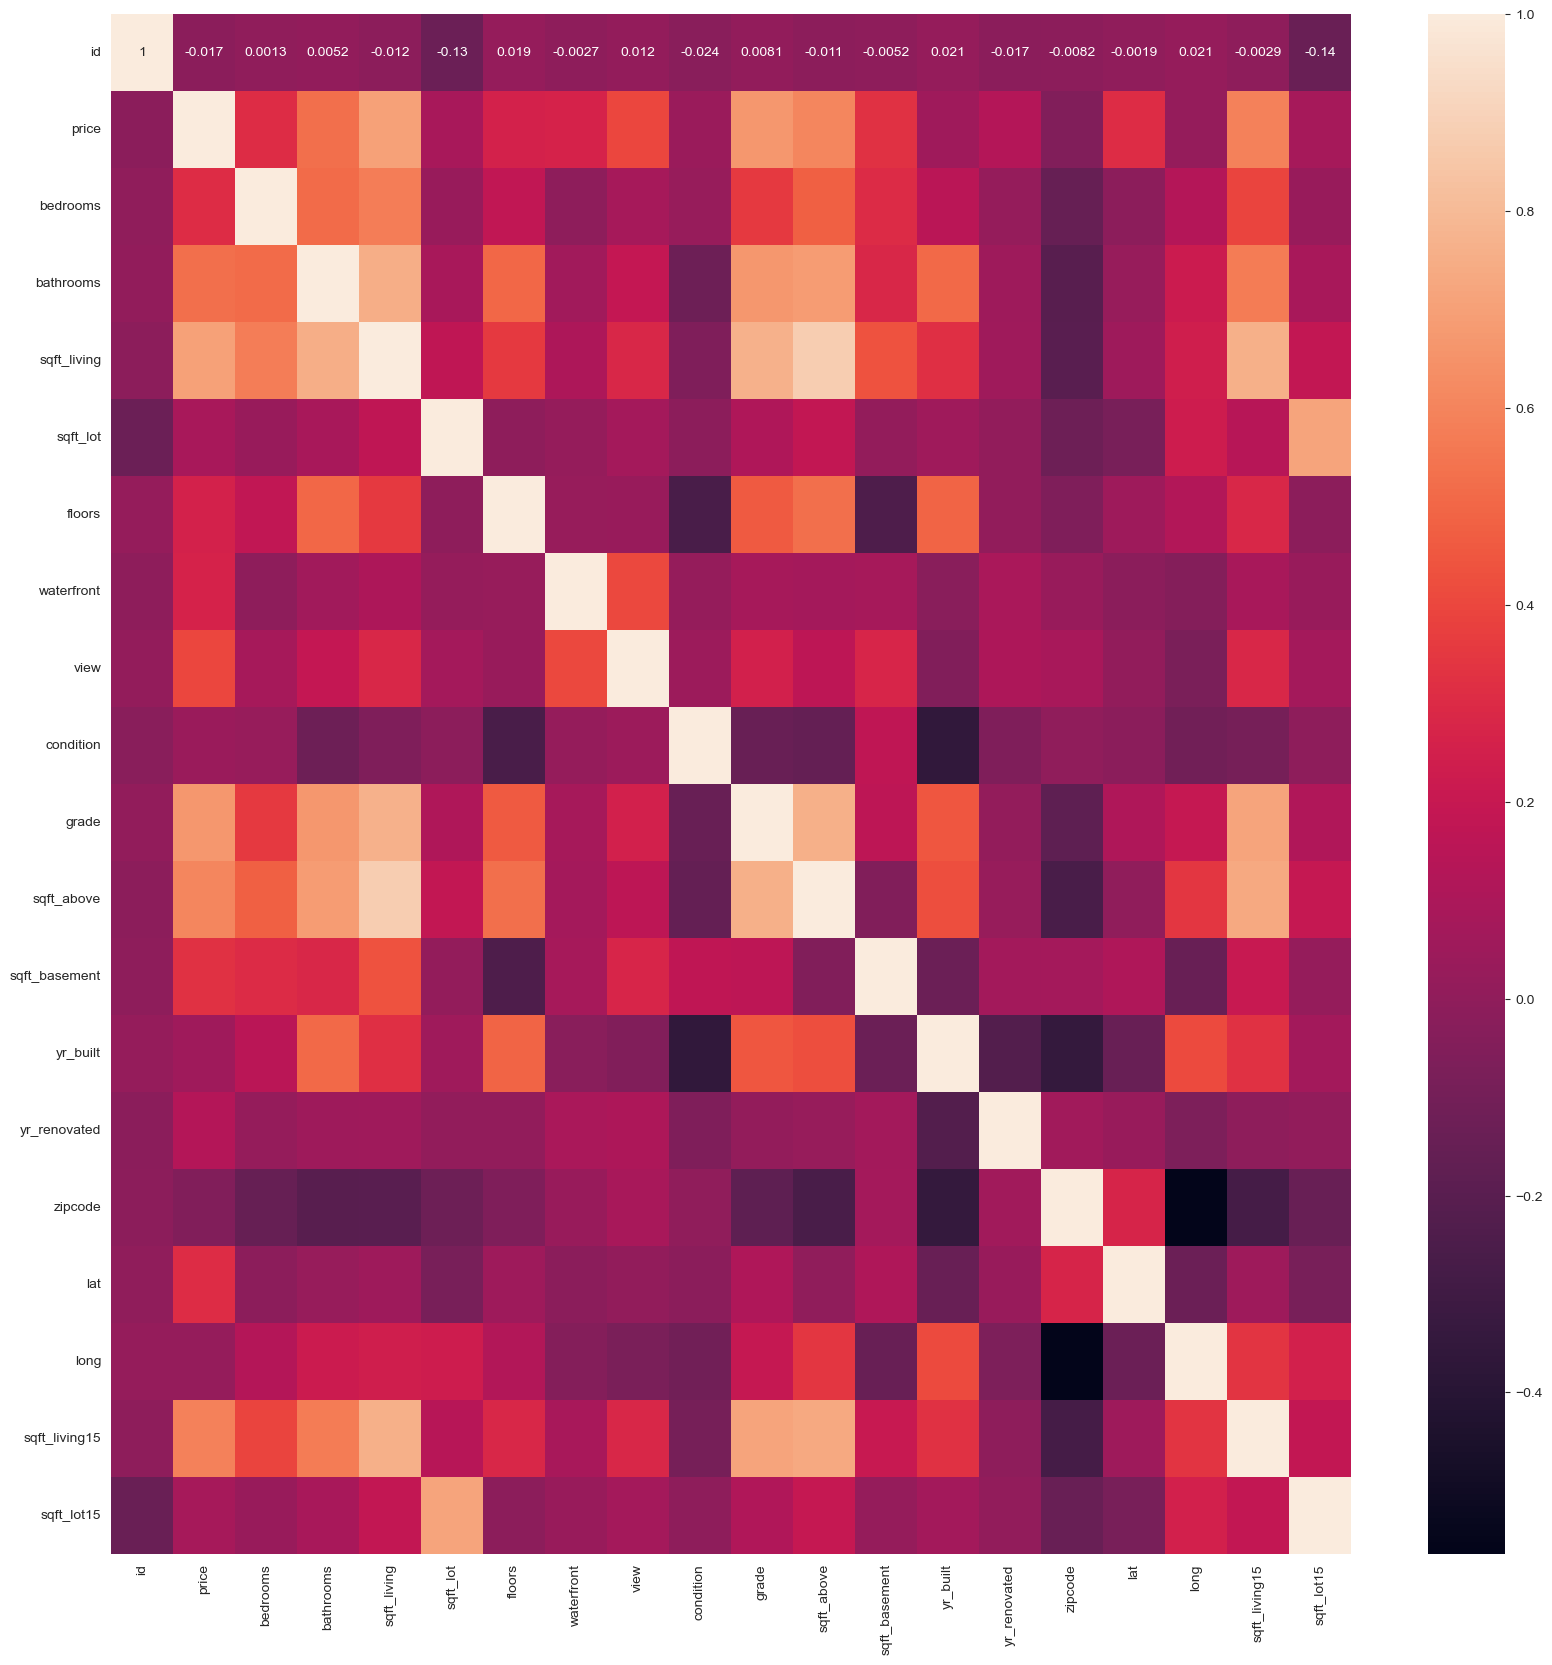

In [14]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [15]:
abs(df.corr(numeric_only=True)['price']).sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
zipcode          0.053203
condition        0.036362
long             0.021626
id               0.016762
Name: price, dtype: float64

In [16]:
# find the columns with missing values - outliears
df['bedrooms'].mean() + (3 * df['bedrooms'].std())

6.1610271165396

### Data Visualization

<Axes: >

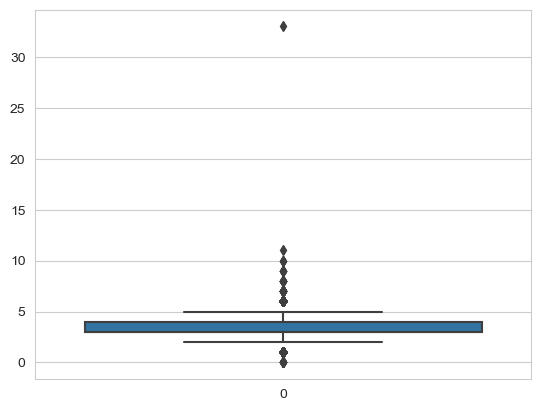

In [17]:
sns.boxplot(df['bedrooms'])

<Axes: >

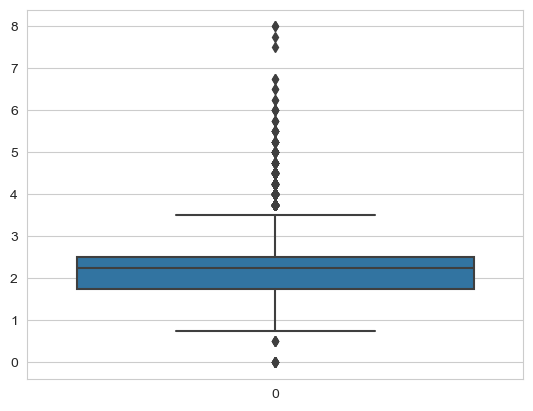

In [18]:
sns.boxplot(df['bathrooms'])

<Axes: >

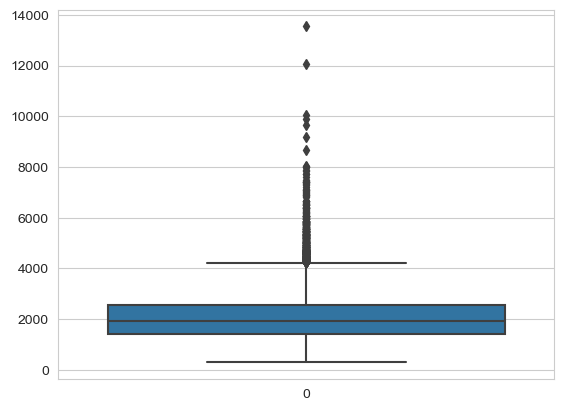

In [19]:
sns.boxplot(df['sqft_living'])

In [20]:
#zip code should be categorical
df['zipcode'] = df['zipcode'].astype('category')

<Axes: xlabel='bedrooms', ylabel='Density'>

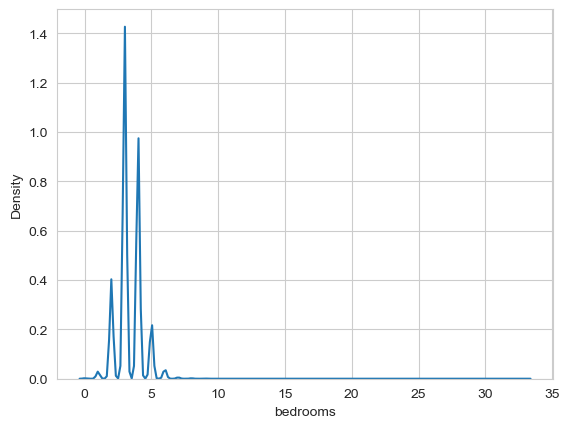

In [24]:
sns.kdeplot(x=df['bedrooms'])

<Axes: xlabel='bedrooms', ylabel='Count'>

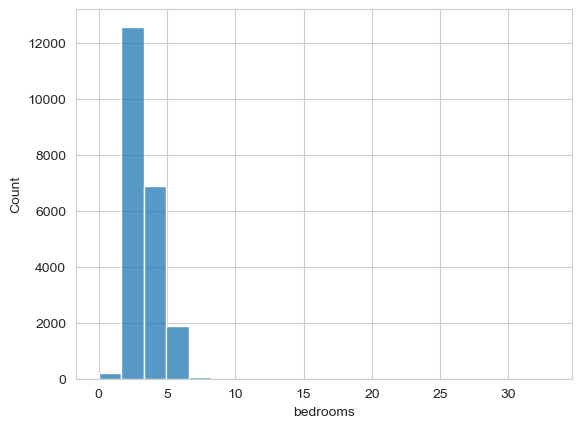

In [26]:
sns.histplot(df['bedrooms'], bins=20)

### Outliers

In [22]:
outliers = df.quantile(q=.99, numeric_only=True)

In [29]:
df = df[(df['price'] < outliers['price'])]
df = df[(df['bedrooms'] < outliers['bedrooms'])]
df = df[(df['bathrooms'] < outliers['bathrooms'])]
df = df[(df['sqft_living'] < outliers['sqft_living'])]

<Axes: xlabel='bedrooms', ylabel='Count'>

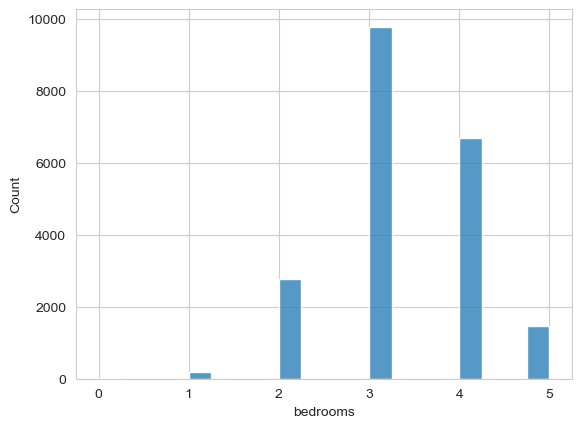

In [30]:
sns.histplot(df['bedrooms'], bins=20)

<Axes: xlabel='bathrooms', ylabel='Count'>

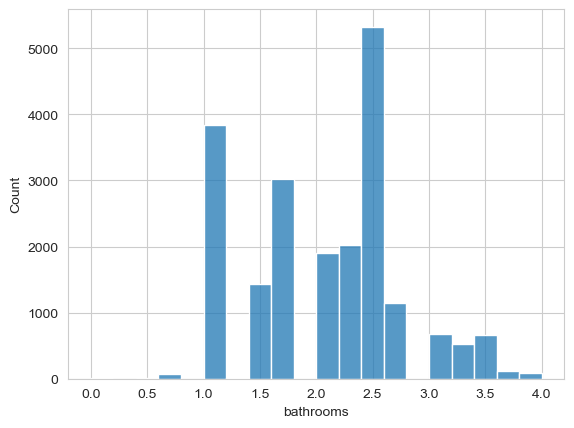

In [31]:
sns.histplot(df['bathrooms'], bins=20)

<Axes: xlabel='sqft_living', ylabel='Count'>

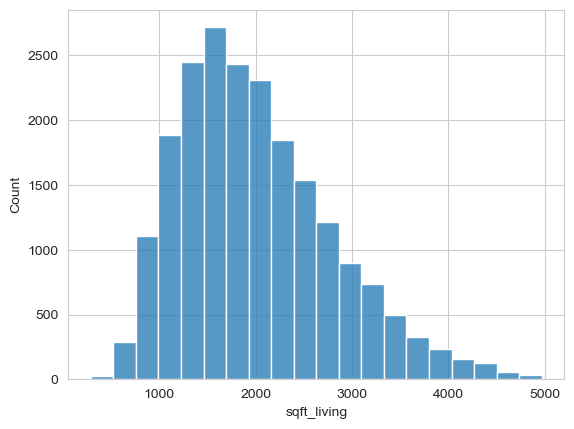

In [32]:
sns.histplot(df['sqft_living'], bins=20)

<Axes: xlabel='price', ylabel='Count'>

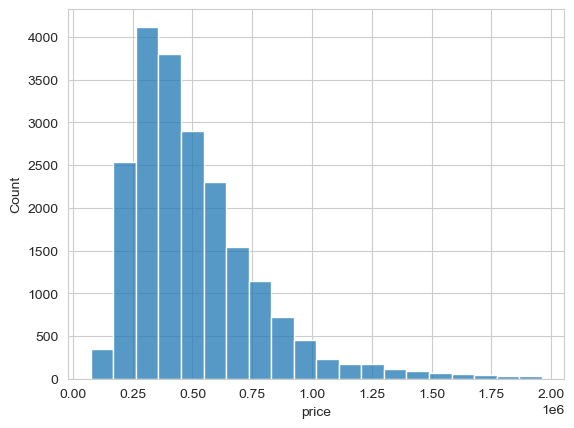

In [33]:
sns.histplot(df['price'], bins=20)

<Axes: >

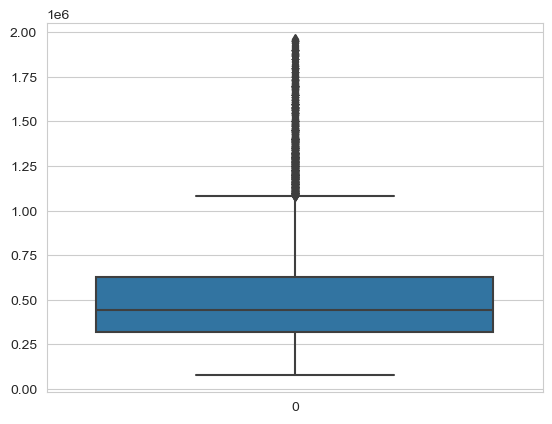

In [34]:
sns.boxplot(df['price'])

## Feature Engineering

In [35]:
df['zipcode'] = df['zipcode'].astype('category')

In [36]:
# bedrooms ire more important than columns
df['bedrooms'] = df['bedrooms'] ** 2

In [37]:
df['bathrooms'] = df['bathrooms'] ** 2
df['sqft_living'] = df['sqft_living'] ** 2

In [40]:
import datetime

current_year = datetime.datetime.now().year
df['age'] = current_year - df['yr_built']

In [41]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
0,7129300520,20141013T000000,221900.0,9,1.0000,1392400,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,69
1,6414100192,20141209T000000,538000.0,9,5.0625,6604900,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,73
2,5631500400,20150225T000000,180000.0,4,1.0000,592900,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,91
3,2487200875,20141209T000000,604000.0,16,9.0000,3841600,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,59
4,1954400510,20150218T000000,510000.0,9,4.0000,2822400,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,37


In [42]:
# when the house is renovated is 1 if renovated else 0
df['yr_renovated'] = np.where(df['yr_renovated'] > 0, 1, 0)
df['sqft_basement'] = np.where(df['sqft_basement'] > 0, 1, 0)


In [43]:
x = df.drop(['id', 'date', 'price', 'lat', 'long'], axis=1)
y = df[['price']]

In [47]:
x = pd.get_dummies(x, drop_first=True)

### Model Building

In [51]:
def model_fit(x, y, model):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    print('MSE:', mean_squared_error(y_test, pred)**0.5)
    print('R2:', r2_score(y_test, pred))
    return model

In [52]:
model_fit(x, y, LinearRegression())

MSE: 106605.54283399791
R2: 0.8452596879516004


LinearRegression()

In [53]:
model_fit(x, y, Ridge())

MSE: 106750.7044062029
R2: 0.8448379905513494


Ridge()

In [54]:
model_fit(x, y, Lasso())

MSE: 106607.9496944418
R2: 0.8452527006499919


Lasso()

In [56]:
model_fit(x, y, ElasticNet())

MSE: 166818.7389822815
R2: 0.6210921835663529


ElasticNet()

In [58]:
#import RegressionFunction as rf

In [59]:
#rf.algo_test(x, y)

,R_Squared,RMSE,MAE
XGBRegressor,8.637656e-01,1.000280e+05,6.775292e+04
Linear,8.452597e-01,1.066055e+05,7.383236e+04
Lasso,8.452527e-01,1.066079e+05,7.382750e+04
Ridge,8.448380e-01,1.067507e+05,7.387950e+04
Gradient Boosting,7.975665e-01,1.219324e+05,8.963767e+04
Extra Tree,6.755846e-01,1.543579e+05,1.009607e+05
Decision Tree,6.648000e-01,1.569026e+05,1.031526e+05
ElasticNet,6.210922e-01,1.668187e+05,1.225528e+05
mlp_regressor,4.470458e-01,2.015221e+05,1.445864e+05
AdaBoost,4.149044e-01,2.072963e+05,1.488057e+05


# Result:

## Goals: RMSE < 100000, R2 > 0.8
* Linear Regression: MSE: 106605, R2: 0.85
* Ridge: MSE: 106750, R2: 0.84
* Lasso: MSE: 106607, R2: 0.85
* ElasticNet: MSE: 166818, R2: 0.62


## Feature Importance
